In [7]:
# --- Load Dataset ---
df = pd.read_csv("plants.csv")

# Preview data and columns
print("Dataset preview:")
print(df.head())
print("\nColumns in dataset:")
print(df.columns)

# --- Preprocessing ---

# OPTIONAL: Drop any irrelevant or unnamed index column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]



Dataset preview:
   sunlight_hours  watering_freq_per_week soil_type water_need
0        7.789136                       6     sandy        low
1       11.668008                       4     loamy       high
2        9.003943                       2     loamy        low
3       11.148641                       5     loamy        low
4        9.384333                       2      clay       high

Columns in dataset:
Index(['sunlight_hours', 'watering_freq_per_week', 'soil_type', 'water_need'], dtype='object')


In [ ]:
# Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le





In [6]:
# Title: Classify Plants Based on Water Needs
# Name: [Your Full Name]
# Roll Number: [Your Roll Number]
# Google Colab Notebook for AI MSE Report

# --- Introduction ---
"""
In this project, we aim to classify plants based on their water requirements using environmental factors.
We will use the 'plants.csv' dataset and apply classification techniques to solve this.
"""
# --- Import Libraries ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score





Accuracy: 0.25

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.20      0.18         5
           1       0.33      0.27      0.30        11
           2       0.20      0.25      0.22         4

    accuracy                           0.25        20
   macro avg       0.23      0.24      0.23        20
weighted avg       0.27      0.25      0.25        20



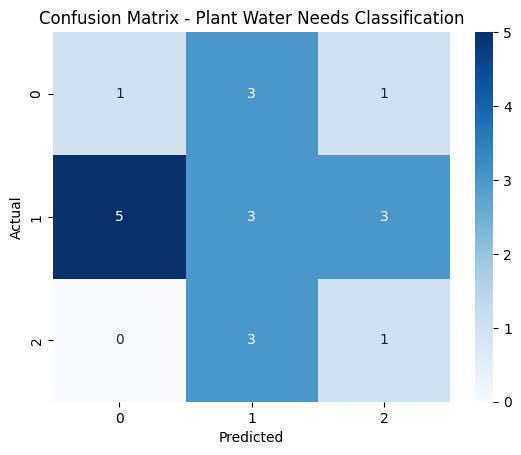

"\nDataset: Provided 'plants.csv'\nScikit-learn documentation: https://scikit-learn.org/\nSeaborn visualization: https://seaborn.pydata.org/\n"

In [13]:


# --- Set Target Column ---
target_column = 'water_need'  # ✅ Correct column name from your dataset

X = df.drop(target_column, axis=1)
y = df[target_column]

# --- Feature Scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --- Model Training ---
model = RandomForestClassifier()
model.fit(X_train, y_train)

# --- Prediction ---
y_pred = model.predict(X_test)

# --- Evaluation ---
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Output/Result - Confusion Matrix ---
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Plant Water Needs Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- References/Credits ---
"""
Dataset: Provided 'plants.csv'
Scikit-learn documentation: https://scikit-learn.org/
Seaborn visualization: https://seaborn.pydata.org/
"""
